# Regresión Lineal Multiple

In [1]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Cargar Datos

Los datos corresponden a 50 empresas emprendedoras, con las siguientes columnas:
* R&D Spend: gastos en Investigación y Desarrollo
* Administration: gastos en Administración
* Marketing Spend: gastos en Mercadotecnia
* State: estado en el que se ubica la compañía
* Profit: utilidad

El objetivo es generar un modelo que pueda predecir la utilidad que tendrá una nueva empresa, basándose en los gastos que realiza en las diferentes áreas y el estado en el que se ubica

In [2]:
# Importar el conjunto de datos
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

## Revisar los datos

In [3]:
type(X)

numpy.ndarray

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## EDA (Análisis Exploratorio de Datos)

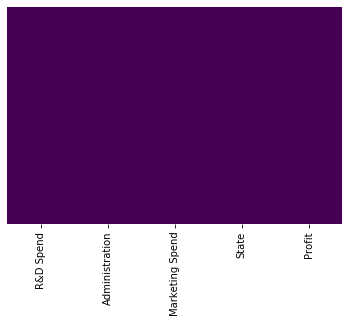

In [7]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

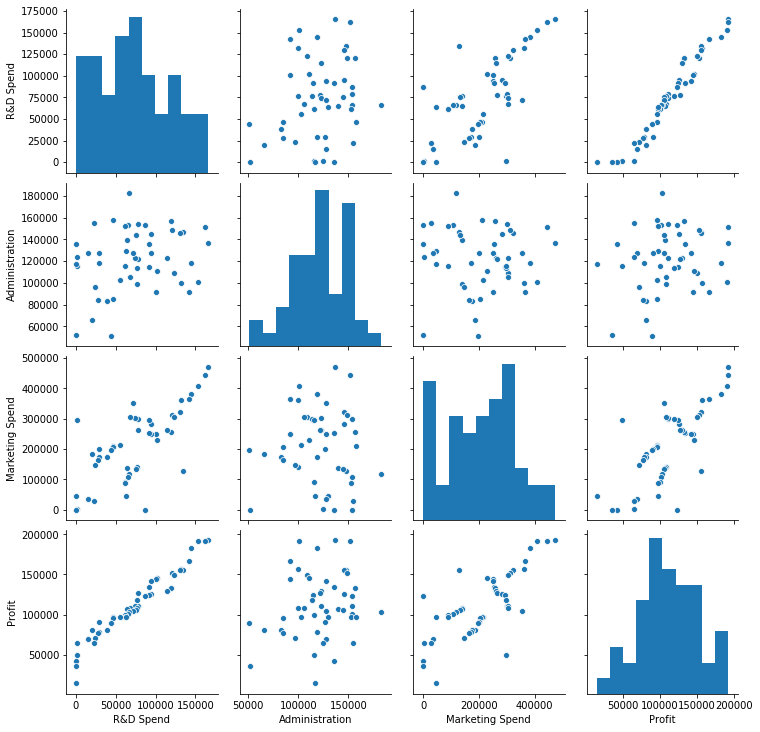

In [8]:
#Despleguemos las correlaciones entre las diferentes características
sns.pairplot(dataset,palette='Set1')

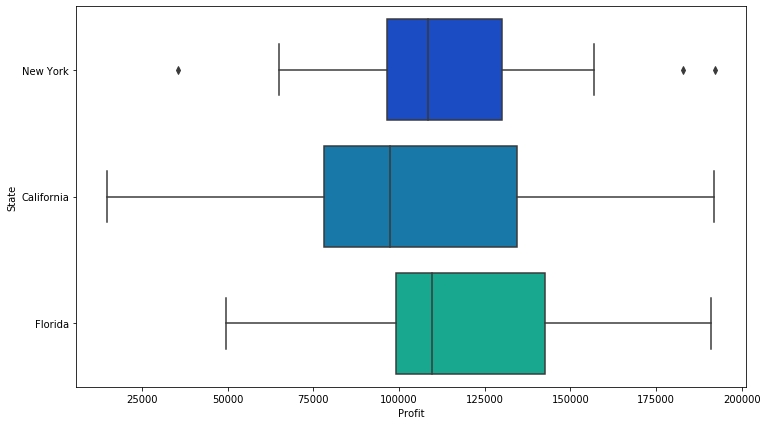

In [9]:
# Veamos la distribución por estado
plt.figure(figsize=(12, 7))
sns.boxplot(x='Profit',y='State',data=dataset,palette='winter')

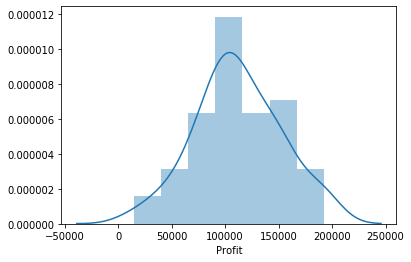

In [10]:
#Veamos la distribución de la utilidad
sns.distplot(dataset['Profit'])

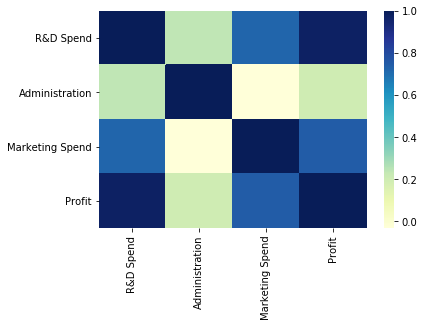

In [11]:
#Veamos la relación entre las características, mediante un mapa de calor
sns.heatmap(dataset.corr(),cmap="YlGnBu")

## Codificar los datos categóricos

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), [3])],    # Los números de columnas que serán transformados (en este caso [0], pero puede ser [0, 1, 3])
    remainder='passthrough'                         # No modificar el resto de las columnas
)
print(ct)
X = np.array(ct.fit_transform(X), dtype=np.float)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [3])],
                  verbose=False)


In [13]:
print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de pruebas

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluación

In [16]:
#### imprimimos la intercepción
print(regression.intercept_)

42554.16761772438


In [17]:
Z=dataset[['R&D Spend','Administration','Marketing Spend','State','Profit']]

In [18]:
regression.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [19]:
coeff_df = pd.DataFrame(regression.coef_,Z.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,-959.284160
Administration,699.369053
Marketing Spend,0.773467
State,0.032885
Profit,0.036610


## Predicción de los resultados en el conjunto de pruebas

In [20]:
y_pred = regression.predict(X_test)

In [21]:
# Construir el modelo óptimo de Regresión Lineal utilizando la Eliminación hacia atrás
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
SL = 0.05

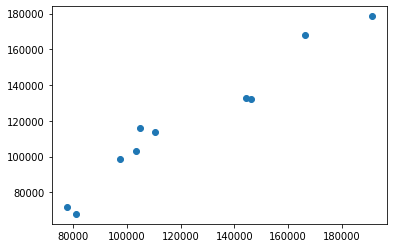

In [22]:
#Veamos la relación entre los valores verdaderos y las predicciones
plt.scatter(y_test,y_pred)

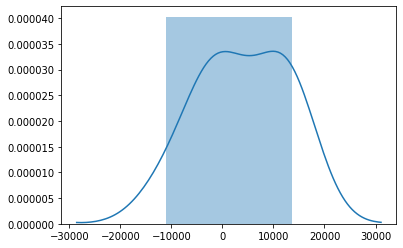

In [23]:
sns.distplot((y_test-y_pred))

In [78]:
# Eva
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7514.293659640891
MSE: 83502864.03257468
RMSE: 9137.990152794797


## Visualización

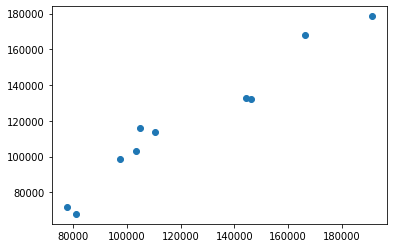

In [79]:
plt.scatter(y_test,y_pred)

## Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás

In [94]:
import statsmodels.api as sm

In [95]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
SL = 0.05


In [96]:
#Se ha añadido el modificador .tolist() al X_opt para adaptarse a Python 3.7

X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
#regression_OLS
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:32   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x1          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x2          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x3          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x4          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x5          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.97e+80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.74e-159. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:36   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x1           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x2           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x3           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x4           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.61e+64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.66e-127. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
X_opt = X[:, [0, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:54   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x1            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x2            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x3            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.47e+48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.2e-95. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:


X_opt = X[:, [0, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:57   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x1          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x2          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     4.06e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.12e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
X_opt = X[:, [0, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:38:01   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
x1          5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     4.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""